<a href="https://colab.research.google.com/github/sunjana2199/Deep_Video_Understanding/blob/main/Video_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow

In [5]:
import os
import cv2
# import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
 
from moviepy.editor import *
%matplotlib inline
 
from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3162112/45929032 bytes (6.9%)6643712/45929032 bytes (14.5%)10469376/45929032 bytes (22.8%)13959168/45929032 bytes (30.4%)17563648/45929032 bytes (38.2%)21045248/45929032 bytes (45.8%)24625152/45929032 bytes (53.6%)28172288/45929032 bytes (61.3%)31694848/45929032 bytes (69.0%)35209216/45929032 bytes (76.7%)38805504/45929032 bytes (84.5%)42491904/45929032 bytes (92.5%)

In [6]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
 

SEQUENCE_LENGTH = 10
 
# Specify the directory containing the UCF50 dataset. 

 

In [19]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''
 
    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)
 
    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
 
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
 
    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):
 
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
 
        # Reading the frame from the video. 
        success, frame = video_reader.read() 
 
        # Check if Video frame is not successfully read then break the loop
        if not success:
            break
 
        # Resize the Frame to fixed height and width.
        # resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        # normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(frame)
    
    # Release the VideoCapture object. 
    video_reader.release()
 
    # Return the frames list.
    return frames_list

In [20]:
path = 'https://mtc.cdn.vine.co/r/videos_h264high/432F4EFFCF1220566615989878784_3bd7c16c514.4.0.14687902276175147572.mp4'
y = frames_extraction(path)
y

[array([[[ 37,  89,  56],
         [ 35,  87,  54],
         [ 29,  81,  48],
         ...,
         [102, 134, 107],
         [102, 134, 107],
         [102, 134, 107]],
 
        [[ 37,  89,  56],
         [ 35,  87,  54],
         [ 29,  81,  48],
         ...,
         [ 97, 129, 102],
         [ 96, 128, 101],
         [ 96, 128, 101]],
 
        [[ 35,  87,  54],
         [ 34,  86,  53],
         [ 29,  81,  48],
         ...,
         [107, 139, 112],
         [105, 137, 110],
         [105, 137, 110]],
 
        ...,
 
        [[ 54, 140, 140],
         [ 54, 140, 140],
         [ 53, 139, 139],
         ...,
         [116, 191, 179],
         [104, 179, 167],
         [ 93, 168, 156]],
 
        [[ 54, 140, 140],
         [ 54, 140, 140],
         [ 54, 140, 140],
         ...,
         [115, 190, 178],
         [104, 179, 167],
         [ 93, 168, 156]],
 
        [[ 54, 140, 140],
         [ 54, 140, 140],
         [ 54, 140, 140],
         ...,
         [115, 190, 178],
  

In [21]:
from PIL import Image
import numpy as np

arr = np.array(y) 

In [23]:

for i in arr:
  
  img = Image.fromarray(i, 'RGB')
  img.save('my.png')
  img.show()
  

# w, h = 512, 512
# data = np.zeros((h, w, 3), dtype=np.uint8)
# data[0:256, 0:256] = [255, 0, 0] # red patch in upper left


(-0.5, 479.5, 479.5, -0.5)

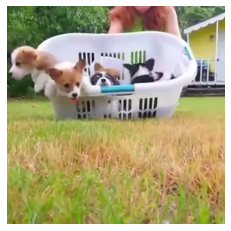

In [25]:

video_path = "https://mtc.cdn.vine.co/r/videos_h264high/432F4EFFCF1220566615989878784_3bd7c16c514.4.0.14687902276175147572.mp4"
video_reader = cv2.VideoCapture(video_path)

_, bgr_frame = video_reader.read()

video_reader.release()

rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)


plt.imshow(rgb_frame)
plt.axis('off')

(-0.5, 479.5, 479.5, -0.5)

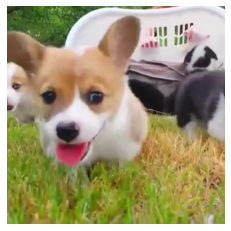

In [43]:
video_path = "https://mtc.cdn.vine.co/r/videos_h264high/432F4EFFCF1220566615989878784_3bd7c16c514.4.0.14687902276175147572.mp4"
video_reader = cv2.VideoCapture(video_path)
total_frames = video_reader.get(7)

video_reader.set(1, 100)
# ret, frame = video_reader.read()

_, bgr_frame = video_reader.read()

video_reader.release()

rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)



plt.imshow(rgb_frame)
plt.axis('off')

(-0.5, 479.5, 479.5, -0.5)

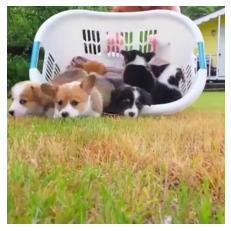

In [58]:
 
# for i in range(10,190,20, 1) :
#   for n in range(1,9):
video_path = "https://mtc.cdn.vine.co/r/videos_h264high/432F4EFFCF1220566615989878784_3bd7c16c514.4.0.14687902276175147572.mp4"
video_reader = cv2.VideoCapture(video_path)
total_frames = video_reader.get(7)

video_reader.set(1, 28)
ret, frame = video_reader.read()

_, bgr_frame = video_reader.read()

video_reader.release()

rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # cv2.imwrite("/content/sample_data", frame)
    
    # plt.subplot(5, 4, counter)
plt.imshow(rgb_frame)
plt.axis('off')

In [41]:
frame = 15
video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame-1)

False

In [32]:
video_path = "https://mtc.cdn.vine.co/r/videos_h264high/432F4EFFCF1220566615989878784_3bd7c16c514.4.0.14687902276175147572.mp4"

video_reader = cv2.VideoCapture(video_path)


In [33]:
video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))


In [35]:
video_frames_count

196

In [36]:
random_range = random.sample(range(196), 20)

In [38]:

SEQUENCE_LENGTH = 10

# frames_list = []

video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))



skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

for counter, frame_counter in enumerate(random_range, 1):

  video_path = "https://mtc.cdn.vine.co/r/videos_h264high/432F4EFFCF1220566615989878784_3bd7c16c514.4.0.14687902276175147572.mp4"

  video_reader = cv2.VideoCapture(video_path)

  video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

  _, bgr_frame = video_reader.read()

  video_reader.release()

  rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

  # frames_list.append(rgb_frame)

  
    
  plt.subplot(5, 4, counter)
  plt.imshow(rgb_frame)

  plt.axis('off')

error: ignored